Importamos las librerias pandas, numpy, matplotlib y math

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

Leemos el archivo csv. Enlace: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer

In [ ]:
archivo = pd.read_csv("/content/cancer.csv")
data = archivo
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
data['LUNG_CANCER'] = data['LUNG_CANCER'].replace({'YES': 2, 'NO': 1})
data['GENDER'] = data['GENDER'].replace({'M': 2, 'F': 1})

In [ ]:
data.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,1.524272,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,1.873786
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,1.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
50%,2.000000,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000
75%,2.000000,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
data.corr()['LUNG_CANCER'].sort_values(ascending=False)

LUNG_CANCER              1.000000
ALLERGY                  0.327766
ALCOHOL CONSUMING        0.288533
SWALLOWING DIFFICULTY    0.259730
WHEEZING                 0.249300
COUGHING                 0.248570
CHEST PAIN               0.190451
PEER_PRESSURE            0.186388
YELLOW_FINGERS           0.181339
FATIGUE                  0.150673
ANXIETY                  0.144947
CHRONIC DISEASE          0.110891
AGE                      0.089465
GENDER                   0.067254
SHORTNESS OF BREATH      0.060738
SMOKING                  0.058179
Name: LUNG_CANCER, dtype: float64

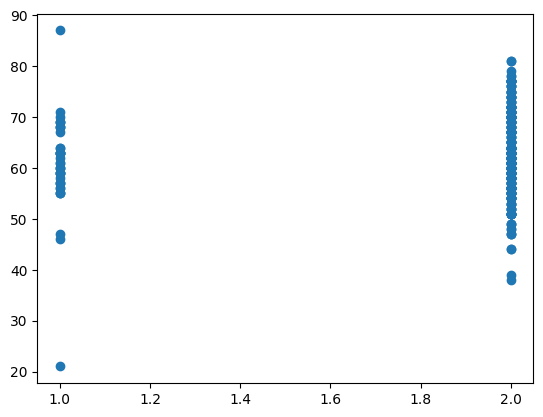

In [ ]:
plt.scatter(data['LUNG_CANCER'], data['AGE'])

In [ ]:
def division_datos(entrenamiento, datos, seed = 1):
  entrenamiento = int(entrenamiento*len(data))
  prueba = len(data) - entrenamiento

  entrenamiento = data.sample(n=entrenamiento, random_state = seed)
  prueba = data.drop(entrenamiento.index)

  return [entrenamiento,prueba]

In [ ]:
def Normalizar_entrenamiento(datos):
  min = datos.min().min()
  max = datos.max().max()
  datos = (datos - min) / (max - min)
  return datos, min, max

In [ ]:
def Normalizar(datos,min,max):
  return (datos - min) / (max - min)

In [ ]:
def prediccion (theta,datos):
  datos_ = datos.copy()
  datos_.insert(0, 'x0', 1)
  return h0(theta,datos_)

In [ ]:
def ECM (Y_test,predic):
  return ((Y_test - predic) ** 2).mean().values[0]

In [ ]:
def h0(x,theta):
  return 1 / ( 1 + np.exp(-(np.dot(theta,x))))

In [ ]:
def Regresion_logistica(columnas_entrada,columna_salida,iteraciones, aprendizaje):

  # Seteamos algunos parametros iniciales
  variables = columnas_entrada.shape[1] + 1
  theta = np.zeros(variables).reshape(variables,1) # Se le agrega el x0 = 1
  cantidad_datos = columnas_entrada.shape[0]
  y = columna_salida.values
  x = columnas_entrada.copy()
  x.insert(0, 'x0', 1)
  x = x.values

  # Realizamos el entrenamiento

  while iteraciones:
    iteraciones -= 1

    # Entrenamos cada theta
    for O in range(theta.shape[0]):

      costo = sum( (h0(theta,x)-y) * x[:,O].reshape(-1,1))
      theta[O] -= aprendizaje / cantidad_datos * costo

  return theta.reshape(variables,1)

Seleccionamos las columnas de entrada y salida

In [ ]:
columnas_entrada = ["FATIGUE ", "PEER_PRESSURE"]
columna_salida = ["LUNG_CANCER"]

In [ ]:
data = data[columnas_entrada + columna_salida]
data

,FATIGUE,PEER_PRESSURE,LUNG_CANCER
0,2,1,2
1,2,1,2
2,2,2,1
3,1,1,1
4,1,1,1
...,...,...,...
304,2,2,2
305,2,1,2
306,1,1,2
307,2,1,2


In [ ]:
seed = 20
exp_1 = division_datos(entrenamiento = 0.7, datos = data, seed = seed)
exp_2 = division_datos(entrenamiento = 0.5, datos = data, seed = seed)
exp_3 = division_datos(entrenamiento = 0.3, datos = data, seed = seed)

In [ ]:
exp_1[0], min1, max1 = Normalizar_entrenamiento(exp_1[0])
exp_2[0], min2, max2 = Normalizar_entrenamiento(exp_2[0])
exp_3[0], min3, max3 = Normalizar_entrenamiento(exp_3[0])

In [ ]:
exp_1[1] = Normalizar(exp_1[1], min1, max1)
exp_2[1] = Normalizar(exp_2[1], min2, max2)
exp_3[1] = Normalizar(exp_3[1], min3, max3)

In [ ]:
exp_1[0].describe()

,FATIGUE,PEER_PRESSURE,LUNG_CANCER
count,216.000000,216.000000,216.00000
mean,0.662037,0.490741,0.87963
std,0.474115,0.501076,0.32615
min,0.000000,0.000000,0.00000
25%,0.000000,0.000000,1.00000
50%,1.000000,0.000000,1.00000
75%,1.000000,1.000000,1.00000
max,1.000000,1.000000,1.00000


In [ ]:
X_1 = exp_1[0][columnas_entrada]
Y_1 = exp_1[0][columna_salida]
X_2 = exp_2[0][columnas_entrada]
Y_2 = exp_2[0][columna_salida]
X_3 = exp_3[0][columnas_entrada]
Y_3 = exp_3[0][columna_salida]

iteraciones = 20
ratio = 0.1

theta_1 = Regresion_logistica(X_1,Y_1,iteraciones,ratio)
theta_2 = Regresion_logistica(X_2,Y_2,iteraciones,ratio)
theta_3 = Regresion_logistica(X_3,Y_3,iteraciones,ratio)
theta_1

array([[0.5256035 ],
       [0.35693113],
       [0.2736938 ]])

In [ ]:
X_1 = exp_1[1][columnas_entrada]
Y_1 = exp_1[1][columna_salida]
X_2 = exp_2[1][columnas_entrada]
Y_2 = exp_2[1][columna_salida]
X_3 = exp_3[1][columnas_entrada]
Y_3 = exp_3[1][columna_salida]

In [ ]:
Y_1_pred = prediccion(theta_1, X_1)
ecm_valor = ECM(Y_1_pred, Y_1)
ecm_valor

0.13272047789822689

In [ ]:
Y_2_pred = prediccion(theta_2, X_2)
ecm_valor = ECM(Y_2_pred, Y_2)
ecm_valor

0.1306612716158728

In [ ]:
Y_3_pred = prediccion(theta_3, X_3)
ecm_valor = ECM(Y_3_pred, Y_3)
ecm_valor

0.1327203856887883

Veamos cuanto porciento se equivoca si definimos el resultado

In [ ]:
def decision(Y_pred, delta):
  for i in range(Y_pred.shape[0]):
      Y_pred[i] = Y_pred[i] > delta
  return Y_pred

In [ ]:
Y_1_dec = decision(Y_1_pred.copy(),0.5256035)
ecm_valor = ECM(Y_1_dec, Y_1)
ecm_valor

0.13978494623655913

In [ ]:
Y_2_dec = decision(Y_2_pred.copy(),0.5256035)
ecm_valor = ECM(Y_2_dec, Y_2)
ecm_valor

0.12258064516129032

In [ ]:
Y_3_dec = decision(Y_3_pred.copy(),0.6)
ecm_valor = ECM(Y_3_dec, Y_3)
ecm_valor

0.11059907834101383